# Number Recognition using MNIST dataset

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Loading the data

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to range [0, 1]

In [26]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


# Convert labels to one-hot encoded vectors

In [27]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Convert labels to one-hot encoded vectors

In [14]:
model = Sequential([
    Flatten(input_shape=(28, 28)),   # Flatten 28x28 images into a 1D array
    Dense(128, activation='relu'),     # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),      # Hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax')    # Output layer with 10 neurons (one for each digit) and softmax activation
])

# Compile the model

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2512 - accuracy: 0.9264 - val_loss: 0.1088 - val_accuracy: 0.9682
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1070 - accuracy: 0.9678 - val_loss: 0.0941 - val_accuracy: 0.9717
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0750 - accuracy: 0.9770 - val_loss: 0.0826 - val_accuracy: 0.9752
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0540 - accuracy: 0.9829 - val_loss: 0.0792 - val_accuracy: 0.9767
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0445 - accuracy: 0.9853 - val_loss: 0.0746 - val_accuracy: 0.9795
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.0797 - val_accuracy: 0.9785
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0955 - val_accuracy:

# Evaluate the model on test data

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0953 - accuracy: 0.9763
Test accuracy: 0.9763000011444092


# Plot the training and validation accuracy over epochs

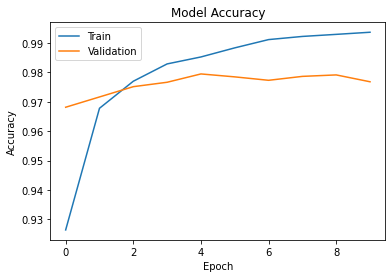

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Make predictions on some test samples

In [17]:
predictions = model.predict(x_test[:50])
predicted_labels = np.argmax(predictions, axis=1)


2/2 [==============================] - 0s 4ms/step


# Visualize the predictions

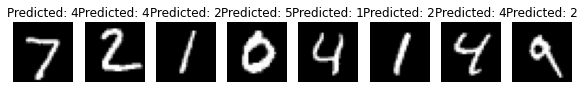

In [18]:
plt.figure(figsize=(10, 5))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.axis('off')
plt.show()